# Import Lib

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pwk as pwk
import models_architecture as ma

from tensorflow.keras.callbacks import TensorBoard
import os
import datetime
import h5py

run_dir = './run'

Init Plugin
Init Graph Optimizer
Init Kernel


# Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test), (x_eval, y_eval) = pwk.load_h5_dataset_train_test_eval('data/minst_train_test_eval.h5')


dataset loaded from h5 file.
x_train : (55000, 28, 28, 1)
y_train : (55000,)
x_test  : (10000, 28, 28, 1)
y_test  : (10000,)
x_test  : (5000, 28, 28, 1)
y_test  : (5000,)


# Model

## parameters

In [3]:
input_shape = (28, 28, 1)

conv2D_1 = [16, 32, 64]
conv2D_2 = [16, 32, 64]
hidden_1   = [50, 100]
hidden_2   = [50, 100]

batch_size = 512
epochs = 40

## run models

In [4]:
def set_model(input_shape, cnv_01, cnv_02, hidden1=100, hidden2=100):
    
    cnv_act_01  = 'relu'
    cnv_act_02  = 'relu'
    hid_act_01  = 'relu'
    hid_act_02  = 'relu'

    model = keras.models.Sequential()

    #input
    model.add( keras.layers.Input(input_shape) )

    #conv2D -> Pooling
    model.add( keras.layers.Conv2D(cnv_01, (3,3),  activation=cnv_act_01) )
    model.add( keras.layers.MaxPooling2D((2,2)))
    model.add( keras.layers.Dropout(0.2))

    #Conv2D -> Pooling
    model.add( keras.layers.Conv2D(cnv_02, (3,3), activation=cnv_act_02) )
    model.add( keras.layers.MaxPooling2D((2,2)))
    model.add( keras.layers.Dropout(0.2))

    #Flatten -> DNN_01 -> DNN_02
    model.add( keras.layers.Flatten()) 
    model.add( keras.layers.Dense(hidden1, activation=hid_act_01))
    model.add( keras.layers.Dense(hidden2, activation=hid_act_02))
    model.add( keras.layers.Dropout(0.5))

    #output
    model.add( keras.layers.Dense(10, activation='softmax'))

    return model

In [5]:
for cv1 in conv2D_1:
    for cv2 in conv2D_2:
        for h1 in hidden_1:
            for h2 in hidden_2:
        
                #set the model
                model = set_model(input_shape, cnv_01=cv1, cnv_02=cv2, hidden1=h1, hidden2=h2)

                #callbacks
                callbcks = pwk.get_callbacks(run_dir)

                #compile
                model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
                #fit
                history = model.fit(x_train, y_train,
                                    batch_size      = batch_size,
                                    epochs          = epochs,
                                    callbacks       = [callbcks['tensorboard'], callbcks['bestmodel'], callbcks['savemodel']],
                                    verbose         = 2,
                                    validation_data = (x_test, y_test))

                print(f'\nModel cv1={cv1} | cv2={cv2} is trained')

Metal device set to: Apple M1

callbacks stored into :  2022-01-05_22h23m57s
tensorboard --logdir /Users/dam/Documents/ML/CNN_minst_large/run/logs --load_fast true


2022-01-05 22:23:57.898755: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-05 22:23:57.899289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-01-05 22:23:57.969799: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:23:57.969807: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:23:57.970117: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:23:58.149747: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (register

Epoch 1/40


2022-01-05 22:23:58.353963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:23:58.544626: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:23:58.544646: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:23:58.586904: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:23:58.590499: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:23:58.594562: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./run/logs/tb_2022-01-05_22h23m57s/train/plugins/profile/2022_01_05_22_23_58
2022-01-05 22:23:58.595222: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./run/logs/tb_2022-01-05_22h23m57s/train/plugins/profile/2022_01_05_22_23_

108/108 - 3s - loss: 1.3270 - accuracy: 0.5440 - val_loss: 0.2997 - val_accuracy: 0.9212


2022-01-05 22:24:01.104902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/40
108/108 - 2s - loss: 0.4146 - accuracy: 0.8733 - val_loss: 0.1645 - val_accuracy: 0.9520
Epoch 3/40
108/108 - 2s - loss: 0.2807 - accuracy: 0.9200 - val_loss: 0.1297 - val_accuracy: 0.9623
Epoch 4/40
108/108 - 2s - loss: 0.2193 - accuracy: 0.9376 - val_loss: 0.1116 - val_accuracy: 0.9664
Epoch 5/40
108/108 - 2s - loss: 0.1861 - accuracy: 0.9482 - val_loss: 0.0954 - val_accuracy: 0.9715
Epoch 6/40
108/108 - 3s - loss: 0.1600 - accuracy: 0.9544 - val_loss: 0.0833 - val_accuracy: 0.9756
Epoch 7/40
108/108 - 3s - loss: 0.1400 - accuracy: 0.9610 - val_loss: 0.0766 - val_accuracy: 0.9776
Epoch 8/40
108/108 - 2s - loss: 0.1297 - accuracy: 0.9641 - val_loss: 0.0724 - val_accuracy: 0.9787
Epoch 9/40
108/108 - 2s - loss: 0.1159 - accuracy: 0.9679 - val_loss: 0.0672 - val_accuracy: 0.9808
Epoch 10/40
108/108 - 2s - loss: 0.1113 - accuracy: 0.9694 - val_loss: 0.0681 - val_accuracy: 0.9804
Epoch 11/40
108/108 - 2s - loss: 0.1015 - accuracy: 0.9722 - val_loss: 0.0629 - val_accuracy: 0.981

2022-01-05 22:25:38.771351: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:25:38.771364: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:25:38.771808: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:25:39.017439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:25:39.124686: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:25:39.124698: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:25:39.155696: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:25:39.159581: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:25:39.162523: I tensorflow/core/profiler

108/108 - 3s - loss: 1.1252 - accuracy: 0.6179 - val_loss: 0.2629 - val_accuracy: 0.9254


2022-01-05 22:25:41.543132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/40
108/108 - 2s - loss: 0.3263 - accuracy: 0.9014 - val_loss: 0.1443 - val_accuracy: 0.9584
Epoch 3/40
108/108 - 2s - loss: 0.2154 - accuracy: 0.9360 - val_loss: 0.1123 - val_accuracy: 0.9668
Epoch 4/40
108/108 - 2s - loss: 0.1718 - accuracy: 0.9483 - val_loss: 0.0931 - val_accuracy: 0.9716
Epoch 5/40
108/108 - 2s - loss: 0.1436 - accuracy: 0.9567 - val_loss: 0.0828 - val_accuracy: 0.9745
Epoch 6/40
108/108 - 2s - loss: 0.1258 - accuracy: 0.9630 - val_loss: 0.0739 - val_accuracy: 0.9775
Epoch 7/40
108/108 - 2s - loss: 0.1139 - accuracy: 0.9666 - val_loss: 0.0667 - val_accuracy: 0.9800
Epoch 8/40
108/108 - 2s - loss: 0.1027 - accuracy: 0.9702 - val_loss: 0.0608 - val_accuracy: 0.9823
Epoch 9/40
108/108 - 2s - loss: 0.0962 - accuracy: 0.9719 - val_loss: 0.0619 - val_accuracy: 0.9825
Epoch 10/40
108/108 - 2s - loss: 0.0900 - accuracy: 0.9727 - val_loss: 0.0597 - val_accuracy: 0.9822
Epoch 11/40
108/108 - 2s - loss: 0.0842 - accuracy: 0.9748 - val_loss: 0.0563 - val_accuracy: 0.983

2022-01-05 22:27:17.178988: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:27:17.179001: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:27:17.179026: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:27:17.387819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:27:17.487045: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:27:17.487058: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:27:17.516543: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:27:17.517001: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:27:17.517625: I tensorflow/core/profiler

108/108 - 3s - loss: 1.1460 - accuracy: 0.6167 - val_loss: 0.2352 - val_accuracy: 0.9374


2022-01-05 22:27:19.832831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/40
108/108 - 2s - loss: 0.3590 - accuracy: 0.8930 - val_loss: 0.1387 - val_accuracy: 0.9607
Epoch 3/40
108/108 - 2s - loss: 0.2450 - accuracy: 0.9299 - val_loss: 0.1063 - val_accuracy: 0.9704
Epoch 4/40
108/108 - 2s - loss: 0.1950 - accuracy: 0.9446 - val_loss: 0.0931 - val_accuracy: 0.9746
Epoch 5/40
108/108 - 2s - loss: 0.1668 - accuracy: 0.9546 - val_loss: 0.0829 - val_accuracy: 0.9767
Epoch 6/40
108/108 - 2s - loss: 0.1423 - accuracy: 0.9595 - val_loss: 0.0722 - val_accuracy: 0.9804
Epoch 7/40
108/108 - 2s - loss: 0.1271 - accuracy: 0.9636 - val_loss: 0.0646 - val_accuracy: 0.9819
Epoch 8/40
108/108 - 2s - loss: 0.1165 - accuracy: 0.9676 - val_loss: 0.0623 - val_accuracy: 0.9833
Epoch 9/40
108/108 - 2s - loss: 0.1060 - accuracy: 0.9705 - val_loss: 0.0612 - val_accuracy: 0.9829
Epoch 10/40
108/108 - 2s - loss: 0.0958 - accuracy: 0.9732 - val_loss: 0.0599 - val_accuracy: 0.9836
Epoch 11/40
108/108 - 2s - loss: 0.0908 - accuracy: 0.9743 - val_loss: 0.0552 - val_accuracy: 0.984

2022-01-05 22:28:53.853241: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:28:53.853249: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:28:53.853265: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:28:53.994009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:28:54.094626: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:28:54.094637: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:28:54.126874: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:28:54.127270: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:28:54.127872: I tensorflow/core/profiler

108/108 - 3s - loss: 0.9850 - accuracy: 0.6707 - val_loss: 0.2160 - val_accuracy: 0.9381


2022-01-05 22:28:56.410082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/40
108/108 - 2s - loss: 0.2840 - accuracy: 0.9152 - val_loss: 0.1295 - val_accuracy: 0.9621
Epoch 3/40
108/108 - 3s - loss: 0.1912 - accuracy: 0.9425 - val_loss: 0.1000 - val_accuracy: 0.9699
Epoch 4/40
108/108 - 2s - loss: 0.1537 - accuracy: 0.9552 - val_loss: 0.0843 - val_accuracy: 0.9747
Epoch 5/40
108/108 - 2s - loss: 0.1253 - accuracy: 0.9627 - val_loss: 0.0755 - val_accuracy: 0.9789
Epoch 6/40
108/108 - 2s - loss: 0.1092 - accuracy: 0.9682 - val_loss: 0.0675 - val_accuracy: 0.9800
Epoch 7/40
108/108 - 2s - loss: 0.1001 - accuracy: 0.9695 - val_loss: 0.0636 - val_accuracy: 0.9816
Epoch 8/40
108/108 - 2s - loss: 0.0884 - accuracy: 0.9735 - val_loss: 0.0598 - val_accuracy: 0.9827
Epoch 9/40
108/108 - 2s - loss: 0.0855 - accuracy: 0.9736 - val_loss: 0.0533 - val_accuracy: 0.9841
Epoch 10/40
108/108 - 2s - loss: 0.0766 - accuracy: 0.9777 - val_loss: 0.0505 - val_accuracy: 0.9855
Epoch 11/40
108/108 - 2s - loss: 0.0728 - accuracy: 0.9780 - val_loss: 0.0508 - val_accuracy: 0.985

2022-01-05 22:30:31.024837: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:30:31.024847: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:30:31.024871: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:30:31.247385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:30:31.362176: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:30:31.362190: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:30:31.399122: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:30:31.399504: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:30:31.400061: I tensorflow/core/profiler

108/108 - 3s - loss: 1.0980 - accuracy: 0.6345 - val_loss: 0.2346 - val_accuracy: 0.9378
Epoch 2/40
108/108 - 3s - loss: 0.3373 - accuracy: 0.9024 - val_loss: 0.1342 - val_accuracy: 0.9602
Epoch 3/40
108/108 - 2s - loss: 0.2298 - accuracy: 0.9357 - val_loss: 0.1031 - val_accuracy: 0.9697
Epoch 4/40
108/108 - 2s - loss: 0.1801 - accuracy: 0.9509 - val_loss: 0.0910 - val_accuracy: 0.9735
Epoch 5/40
108/108 - 2s - loss: 0.1506 - accuracy: 0.9582 - val_loss: 0.0776 - val_accuracy: 0.9788
Epoch 6/40
108/108 - 2s - loss: 0.1333 - accuracy: 0.9639 - val_loss: 0.0733 - val_accuracy: 0.9800
Epoch 7/40
108/108 - 2s - loss: 0.1144 - accuracy: 0.9681 - val_loss: 0.0709 - val_accuracy: 0.9798
Epoch 8/40
108/108 - 2s - loss: 0.1048 - accuracy: 0.9719 - val_loss: 0.0668 - val_accuracy: 0.9816
Epoch 9/40
108/108 - 2s - loss: 0.0958 - accuracy: 0.9740 - val_loss: 0.0623 - val_accuracy: 0.9824
Epoch 10/40
108/108 - 3s - loss: 0.0893 - accuracy: 0.9754 - val_loss: 0.0572 - val_accuracy: 0.9845
Epoch 11/4

2022-01-05 22:32:12.898998: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:32:12.899006: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:32:12.899024: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:32:13.046667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:32:13.161561: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:32:13.161574: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:32:13.188765: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:32:13.189155: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:32:13.189678: I tensorflow/core/profiler

108/108 - 3s - loss: 0.9745 - accuracy: 0.6757 - val_loss: 0.2222 - val_accuracy: 0.9349
Epoch 2/40
108/108 - 3s - loss: 0.2681 - accuracy: 0.9209 - val_loss: 0.1319 - val_accuracy: 0.9628
Epoch 3/40
108/108 - 2s - loss: 0.1826 - accuracy: 0.9470 - val_loss: 0.0979 - val_accuracy: 0.9707
Epoch 4/40
108/108 - 2s - loss: 0.1440 - accuracy: 0.9574 - val_loss: 0.0878 - val_accuracy: 0.9728
Epoch 5/40
108/108 - 2s - loss: 0.1241 - accuracy: 0.9646 - val_loss: 0.0814 - val_accuracy: 0.9744
Epoch 6/40
108/108 - 3s - loss: 0.1058 - accuracy: 0.9687 - val_loss: 0.0666 - val_accuracy: 0.9801
Epoch 7/40
108/108 - 3s - loss: 0.0941 - accuracy: 0.9725 - val_loss: 0.0622 - val_accuracy: 0.9816
Epoch 8/40
108/108 - 3s - loss: 0.0838 - accuracy: 0.9756 - val_loss: 0.0597 - val_accuracy: 0.9826
Epoch 9/40
108/108 - 2s - loss: 0.0783 - accuracy: 0.9766 - val_loss: 0.0540 - val_accuracy: 0.9838
Epoch 10/40
108/108 - 3s - loss: 0.0747 - accuracy: 0.9787 - val_loss: 0.0555 - val_accuracy: 0.9837
Epoch 11/4

2022-01-05 22:33:56.565065: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:33:56.565079: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:33:56.565148: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:33:56.766336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:33:56.895184: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:33:56.895195: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:33:56.929454: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:33:56.929845: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:33:56.930410: I tensorflow/core/profiler

108/108 - 3s - loss: 1.0128 - accuracy: 0.6622 - val_loss: 0.2132 - val_accuracy: 0.9373


2022-01-05 22:33:59.765858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/40
108/108 - 3s - loss: 0.3103 - accuracy: 0.9087 - val_loss: 0.1283 - val_accuracy: 0.9633
Epoch 3/40
108/108 - 3s - loss: 0.2134 - accuracy: 0.9388 - val_loss: 0.1009 - val_accuracy: 0.9711
Epoch 4/40
108/108 - 3s - loss: 0.1652 - accuracy: 0.9531 - val_loss: 0.0864 - val_accuracy: 0.9749
Epoch 5/40
108/108 - 3s - loss: 0.1379 - accuracy: 0.9619 - val_loss: 0.0768 - val_accuracy: 0.9757
Epoch 6/40
108/108 - 3s - loss: 0.1220 - accuracy: 0.9670 - val_loss: 0.0682 - val_accuracy: 0.9808
Epoch 7/40
108/108 - 3s - loss: 0.1058 - accuracy: 0.9705 - val_loss: 0.0645 - val_accuracy: 0.9820
Epoch 8/40
108/108 - 3s - loss: 0.0931 - accuracy: 0.9737 - val_loss: 0.0601 - val_accuracy: 0.9835
Epoch 9/40
108/108 - 3s - loss: 0.0841 - accuracy: 0.9768 - val_loss: 0.0599 - val_accuracy: 0.9834
Epoch 10/40
108/108 - 3s - loss: 0.0767 - accuracy: 0.9790 - val_loss: 0.0539 - val_accuracy: 0.9844
Epoch 11/40
108/108 - 3s - loss: 0.0752 - accuracy: 0.9801 - val_loss: 0.0548 - val_accuracy: 0.985

2022-01-05 22:35:39.618640: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:35:39.618652: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:35:39.618708: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:35:39.785658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:35:39.905097: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:35:39.905109: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:35:39.934630: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:35:39.935009: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:35:39.935566: I tensorflow/core/profiler

108/108 - 3s - loss: 0.8201 - accuracy: 0.7327 - val_loss: 0.1862 - val_accuracy: 0.9477


2022-01-05 22:35:42.386208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/40
108/108 - 3s - loss: 0.2179 - accuracy: 0.9350 - val_loss: 0.1099 - val_accuracy: 0.9674
Epoch 3/40
108/108 - 3s - loss: 0.1480 - accuracy: 0.9557 - val_loss: 0.0851 - val_accuracy: 0.9739
Epoch 4/40
108/108 - 3s - loss: 0.1182 - accuracy: 0.9656 - val_loss: 0.0709 - val_accuracy: 0.9794
Epoch 5/40
108/108 - 3s - loss: 0.0955 - accuracy: 0.9715 - val_loss: 0.0622 - val_accuracy: 0.9811
Epoch 6/40
108/108 - 3s - loss: 0.0883 - accuracy: 0.9744 - val_loss: 0.0596 - val_accuracy: 0.9823
Epoch 7/40
108/108 - 3s - loss: 0.0790 - accuracy: 0.9763 - val_loss: 0.0557 - val_accuracy: 0.9826
Epoch 8/40
108/108 - 3s - loss: 0.0676 - accuracy: 0.9802 - val_loss: 0.0520 - val_accuracy: 0.9841
Epoch 9/40
108/108 - 3s - loss: 0.0628 - accuracy: 0.9817 - val_loss: 0.0502 - val_accuracy: 0.9848
Epoch 10/40
108/108 - 3s - loss: 0.0582 - accuracy: 0.9824 - val_loss: 0.0470 - val_accuracy: 0.9860
Epoch 11/40
108/108 - 3s - loss: 0.0549 - accuracy: 0.9837 - val_loss: 0.0495 - val_accuracy: 0.985

2022-01-05 22:37:22.376089: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:37:22.376097: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:37:22.376114: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:37:22.526601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:37:22.654466: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:37:22.654480: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:37:22.694156: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:37:22.694559: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:37:22.695160: I tensorflow/core/profiler

108/108 - 4s - loss: 1.0490 - accuracy: 0.6474 - val_loss: 0.2203 - val_accuracy: 0.9371
Epoch 2/40
108/108 - 3s - loss: 0.3029 - accuracy: 0.9125 - val_loss: 0.1218 - val_accuracy: 0.9644
Epoch 3/40
108/108 - 3s - loss: 0.1962 - accuracy: 0.9446 - val_loss: 0.0983 - val_accuracy: 0.9716
Epoch 4/40
108/108 - 3s - loss: 0.1572 - accuracy: 0.9562 - val_loss: 0.0849 - val_accuracy: 0.9757
Epoch 5/40
108/108 - 3s - loss: 0.1321 - accuracy: 0.9629 - val_loss: 0.0794 - val_accuracy: 0.9773
Epoch 6/40
108/108 - 3s - loss: 0.1169 - accuracy: 0.9676 - val_loss: 0.0781 - val_accuracy: 0.9789
Epoch 7/40
108/108 - 3s - loss: 0.1039 - accuracy: 0.9717 - val_loss: 0.0654 - val_accuracy: 0.9819
Epoch 8/40
108/108 - 3s - loss: 0.0968 - accuracy: 0.9742 - val_loss: 0.0636 - val_accuracy: 0.9823
Epoch 9/40
108/108 - 3s - loss: 0.0848 - accuracy: 0.9764 - val_loss: 0.0596 - val_accuracy: 0.9833
Epoch 10/40
108/108 - 3s - loss: 0.0798 - accuracy: 0.9784 - val_loss: 0.0584 - val_accuracy: 0.9844
Epoch 11/4

2022-01-05 22:39:26.974852: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:39:26.974861: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:39:26.974921: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/40


2022-01-05 22:39:27.326985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:39:27.467167: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:39:27.467180: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:39:27.506763: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:39:27.507170: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:39:27.507753: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./run/logs/tb_2022-01-05_22h39m26s/train/plugins/profile/2022_01_05_22_39_27
2022-01-05 22:39:27.508122: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./run/logs/tb_2022-01-05_22h39m26s/train/plugins/profile/2022_01_05_22_39_

108/108 - 4s - loss: 0.8449 - accuracy: 0.7225 - val_loss: 0.1871 - val_accuracy: 0.9485
Epoch 2/40
108/108 - 3s - loss: 0.2116 - accuracy: 0.9381 - val_loss: 0.1099 - val_accuracy: 0.9666
Epoch 3/40
108/108 - 3s - loss: 0.1412 - accuracy: 0.9590 - val_loss: 0.0856 - val_accuracy: 0.9749
Epoch 4/40
108/108 - 3s - loss: 0.1097 - accuracy: 0.9683 - val_loss: 0.0663 - val_accuracy: 0.9801
Epoch 5/40
108/108 - 3s - loss: 0.0936 - accuracy: 0.9734 - val_loss: 0.0631 - val_accuracy: 0.9821
Epoch 6/40
108/108 - 3s - loss: 0.0806 - accuracy: 0.9766 - val_loss: 0.0570 - val_accuracy: 0.9836
Epoch 7/40
108/108 - 3s - loss: 0.0725 - accuracy: 0.9790 - val_loss: 0.0543 - val_accuracy: 0.9846
Epoch 8/40
108/108 - 3s - loss: 0.0654 - accuracy: 0.9809 - val_loss: 0.0510 - val_accuracy: 0.9847
Epoch 9/40
108/108 - 3s - loss: 0.0585 - accuracy: 0.9825 - val_loss: 0.0494 - val_accuracy: 0.9865
Epoch 10/40
108/108 - 3s - loss: 0.0565 - accuracy: 0.9835 - val_loss: 0.0478 - val_accuracy: 0.9861
Epoch 11/4

2022-01-05 22:41:35.076563: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:41:35.076575: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:41:35.076650: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:41:35.326791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:41:35.459221: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:41:35.459237: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:41:35.496121: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:41:35.496602: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:41:35.497266: I tensorflow/core/profiler

108/108 - 4s - loss: 0.9387 - accuracy: 0.6906 - val_loss: 0.1784 - val_accuracy: 0.9489
Epoch 2/40
108/108 - 3s - loss: 0.2759 - accuracy: 0.9204 - val_loss: 0.1078 - val_accuracy: 0.9705
Epoch 3/40
108/108 - 3s - loss: 0.1839 - accuracy: 0.9482 - val_loss: 0.0874 - val_accuracy: 0.9760
Epoch 4/40
108/108 - 3s - loss: 0.1415 - accuracy: 0.9599 - val_loss: 0.0793 - val_accuracy: 0.9782
Epoch 5/40
108/108 - 3s - loss: 0.1178 - accuracy: 0.9667 - val_loss: 0.0689 - val_accuracy: 0.9808
Epoch 6/40
108/108 - 3s - loss: 0.1032 - accuracy: 0.9720 - val_loss: 0.0603 - val_accuracy: 0.9825
Epoch 7/40
108/108 - 3s - loss: 0.0922 - accuracy: 0.9751 - val_loss: 0.0591 - val_accuracy: 0.9838
Epoch 8/40
108/108 - 3s - loss: 0.0821 - accuracy: 0.9778 - val_loss: 0.0589 - val_accuracy: 0.9837
Epoch 9/40
108/108 - 3s - loss: 0.0746 - accuracy: 0.9794 - val_loss: 0.0537 - val_accuracy: 0.9849
Epoch 10/40
108/108 - 3s - loss: 0.0701 - accuracy: 0.9816 - val_loss: 0.0539 - val_accuracy: 0.9859
Epoch 11/4

2022-01-05 22:43:41.212878: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:43:41.212887: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:43:41.212959: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:43:41.463012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:43:41.591386: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:43:41.591399: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:43:41.629630: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:43:41.630064: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:43:41.630708: I tensorflow/core/profiler

108/108 - 4s - loss: 0.7449 - accuracy: 0.7594 - val_loss: 0.1574 - val_accuracy: 0.9535
Epoch 2/40
108/108 - 3s - loss: 0.1849 - accuracy: 0.9450 - val_loss: 0.0975 - val_accuracy: 0.9729
Epoch 3/40
108/108 - 3s - loss: 0.1249 - accuracy: 0.9631 - val_loss: 0.0820 - val_accuracy: 0.9765
Epoch 4/40
108/108 - 3s - loss: 0.1009 - accuracy: 0.9699 - val_loss: 0.0686 - val_accuracy: 0.9797
Epoch 5/40
108/108 - 3s - loss: 0.0847 - accuracy: 0.9757 - val_loss: 0.0584 - val_accuracy: 0.9825
Epoch 6/40
108/108 - 3s - loss: 0.0757 - accuracy: 0.9777 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 7/40
108/108 - 3s - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0486 - val_accuracy: 0.9852
Epoch 8/40
108/108 - 3s - loss: 0.0594 - accuracy: 0.9826 - val_loss: 0.0488 - val_accuracy: 0.9864
Epoch 9/40
108/108 - 3s - loss: 0.0548 - accuracy: 0.9839 - val_loss: 0.0458 - val_accuracy: 0.9872
Epoch 10/40
108/108 - 3s - loss: 0.0493 - accuracy: 0.9857 - val_loss: 0.0451 - val_accuracy: 0.9861
Epoch 11/4

2022-01-05 22:45:46.836134: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:45:46.836148: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:45:46.836222: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:45:47.086010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:45:47.272125: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:45:47.272139: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:45:47.310882: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:45:47.311327: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:45:47.312007: I tensorflow/core/profiler

108/108 - 4s - loss: 1.1922 - accuracy: 0.5993 - val_loss: 0.2417 - val_accuracy: 0.9335
Epoch 2/40
108/108 - 3s - loss: 0.3551 - accuracy: 0.8966 - val_loss: 0.1364 - val_accuracy: 0.9610
Epoch 3/40
108/108 - 3s - loss: 0.2433 - accuracy: 0.9315 - val_loss: 0.1130 - val_accuracy: 0.9679
Epoch 4/40
108/108 - 3s - loss: 0.1940 - accuracy: 0.9457 - val_loss: 0.0980 - val_accuracy: 0.9725
Epoch 5/40
108/108 - 3s - loss: 0.1642 - accuracy: 0.9547 - val_loss: 0.0884 - val_accuracy: 0.9760
Epoch 6/40
108/108 - 3s - loss: 0.1403 - accuracy: 0.9613 - val_loss: 0.0782 - val_accuracy: 0.9790
Epoch 7/40
108/108 - 3s - loss: 0.1302 - accuracy: 0.9633 - val_loss: 0.0726 - val_accuracy: 0.9800
Epoch 8/40
108/108 - 3s - loss: 0.1197 - accuracy: 0.9671 - val_loss: 0.0685 - val_accuracy: 0.9805
Epoch 9/40
108/108 - 3s - loss: 0.1109 - accuracy: 0.9704 - val_loss: 0.0638 - val_accuracy: 0.9821
Epoch 10/40
108/108 - 3s - loss: 0.1041 - accuracy: 0.9719 - val_loss: 0.0594 - val_accuracy: 0.9832
Epoch 11/4

2022-01-05 22:47:51.806950: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:47:51.806958: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:47:51.807027: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:47:52.073872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:47:52.216965: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:47:52.216984: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:47:52.253850: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:47:52.254264: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:47:52.254887: I tensorflow/core/profiler

108/108 - 4s - loss: 1.0755 - accuracy: 0.6335 - val_loss: 0.2452 - val_accuracy: 0.9285
Epoch 2/40
108/108 - 4s - loss: 0.2958 - accuracy: 0.9125 - val_loss: 0.1396 - val_accuracy: 0.9597
Epoch 3/40
108/108 - 3s - loss: 0.1975 - accuracy: 0.9416 - val_loss: 0.1062 - val_accuracy: 0.9675
Epoch 4/40
108/108 - 3s - loss: 0.1578 - accuracy: 0.9541 - val_loss: 0.0930 - val_accuracy: 0.9728
Epoch 5/40
108/108 - 3s - loss: 0.1309 - accuracy: 0.9617 - val_loss: 0.0789 - val_accuracy: 0.9776
Epoch 6/40
108/108 - 3s - loss: 0.1146 - accuracy: 0.9658 - val_loss: 0.0716 - val_accuracy: 0.9792
Epoch 7/40
108/108 - 3s - loss: 0.1013 - accuracy: 0.9695 - val_loss: 0.0639 - val_accuracy: 0.9813
Epoch 8/40
108/108 - 3s - loss: 0.0944 - accuracy: 0.9720 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 9/40
108/108 - 3s - loss: 0.0851 - accuracy: 0.9745 - val_loss: 0.0574 - val_accuracy: 0.9835
Epoch 10/40
108/108 - 3s - loss: 0.0778 - accuracy: 0.9766 - val_loss: 0.0534 - val_accuracy: 0.9850
Epoch 11/4

2022-01-05 22:49:56.452601: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:49:56.452610: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:49:56.452631: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:49:56.693160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:49:56.810234: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:49:56.810246: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:49:56.847490: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:49:56.847905: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:49:56.848538: I tensorflow/core/profiler

108/108 - 4s - loss: 1.1245 - accuracy: 0.6254 - val_loss: 0.2454 - val_accuracy: 0.9323
Epoch 2/40
108/108 - 3s - loss: 0.3672 - accuracy: 0.8923 - val_loss: 0.1433 - val_accuracy: 0.9601
Epoch 3/40
108/108 - 3s - loss: 0.2499 - accuracy: 0.9289 - val_loss: 0.1126 - val_accuracy: 0.9669
Epoch 4/40
108/108 - 3s - loss: 0.1981 - accuracy: 0.9442 - val_loss: 0.0935 - val_accuracy: 0.9733
Epoch 5/40
108/108 - 3s - loss: 0.1672 - accuracy: 0.9547 - val_loss: 0.0835 - val_accuracy: 0.9770
Epoch 6/40
108/108 - 3s - loss: 0.1416 - accuracy: 0.9612 - val_loss: 0.0735 - val_accuracy: 0.9797
Epoch 7/40
108/108 - 3s - loss: 0.1275 - accuracy: 0.9647 - val_loss: 0.0708 - val_accuracy: 0.9794
Epoch 8/40
108/108 - 3s - loss: 0.1148 - accuracy: 0.9683 - val_loss: 0.0634 - val_accuracy: 0.9828
Epoch 9/40
108/108 - 3s - loss: 0.1091 - accuracy: 0.9704 - val_loss: 0.0598 - val_accuracy: 0.9836
Epoch 10/40
108/108 - 3s - loss: 0.0982 - accuracy: 0.9724 - val_loss: 0.0559 - val_accuracy: 0.9852
Epoch 11/4

2022-01-05 22:52:00.924547: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:52:00.924558: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:52:00.924577: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:52:01.094928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:52:01.225409: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:52:01.225425: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:52:01.261242: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:52:01.261669: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:52:01.262247: I tensorflow/core/profiler

108/108 - 4s - loss: 0.9586 - accuracy: 0.6791 - val_loss: 0.2081 - val_accuracy: 0.9393
Epoch 2/40
108/108 - 3s - loss: 0.2638 - accuracy: 0.9215 - val_loss: 0.1219 - val_accuracy: 0.9639
Epoch 3/40
108/108 - 3s - loss: 0.1811 - accuracy: 0.9468 - val_loss: 0.0975 - val_accuracy: 0.9704
Epoch 4/40
108/108 - 3s - loss: 0.1433 - accuracy: 0.9573 - val_loss: 0.0850 - val_accuracy: 0.9743
Epoch 5/40
108/108 - 3s - loss: 0.1243 - accuracy: 0.9631 - val_loss: 0.0753 - val_accuracy: 0.9777
Epoch 6/40
108/108 - 3s - loss: 0.1066 - accuracy: 0.9687 - val_loss: 0.0673 - val_accuracy: 0.9802
Epoch 7/40
108/108 - 3s - loss: 0.0951 - accuracy: 0.9716 - val_loss: 0.0620 - val_accuracy: 0.9820
Epoch 8/40
108/108 - 3s - loss: 0.0866 - accuracy: 0.9739 - val_loss: 0.0575 - val_accuracy: 0.9825
Epoch 9/40
108/108 - 3s - loss: 0.0798 - accuracy: 0.9757 - val_loss: 0.0559 - val_accuracy: 0.9842
Epoch 10/40
108/108 - 3s - loss: 0.0765 - accuracy: 0.9778 - val_loss: 0.0512 - val_accuracy: 0.9862
Epoch 11/4

2022-01-05 22:54:05.522259: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:54:05.522267: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:54:05.522320: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:54:05.704269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:54:05.827046: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:54:05.827064: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:54:05.871041: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:54:05.871467: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:54:05.872078: I tensorflow/core/profiler

108/108 - 4s - loss: 1.0918 - accuracy: 0.6306 - val_loss: 0.2131 - val_accuracy: 0.9406
Epoch 2/40
108/108 - 3s - loss: 0.3056 - accuracy: 0.9106 - val_loss: 0.1311 - val_accuracy: 0.9622
Epoch 3/40
108/108 - 3s - loss: 0.2087 - accuracy: 0.9423 - val_loss: 0.1015 - val_accuracy: 0.9704
Epoch 4/40
108/108 - 3s - loss: 0.1578 - accuracy: 0.9562 - val_loss: 0.0847 - val_accuracy: 0.9755
Epoch 5/40
108/108 - 3s - loss: 0.1341 - accuracy: 0.9622 - val_loss: 0.0794 - val_accuracy: 0.9789
Epoch 6/40
108/108 - 3s - loss: 0.1182 - accuracy: 0.9678 - val_loss: 0.0660 - val_accuracy: 0.9819
Epoch 7/40
108/108 - 3s - loss: 0.1046 - accuracy: 0.9709 - val_loss: 0.0658 - val_accuracy: 0.9819
Epoch 8/40
108/108 - 3s - loss: 0.0946 - accuracy: 0.9741 - val_loss: 0.0594 - val_accuracy: 0.9846
Epoch 9/40
108/108 - 3s - loss: 0.0838 - accuracy: 0.9770 - val_loss: 0.0583 - val_accuracy: 0.9848
Epoch 10/40
108/108 - 3s - loss: 0.0796 - accuracy: 0.9790 - val_loss: 0.0566 - val_accuracy: 0.9852
Epoch 11/4

2022-01-05 22:56:16.015665: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:56:16.015674: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:56:16.015728: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:56:16.231843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:56:16.360780: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:56:16.360801: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:56:16.398536: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:56:16.398911: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:56:16.399465: I tensorflow/core/profiler

108/108 - 4s - loss: 0.9520 - accuracy: 0.6761 - val_loss: 0.1923 - val_accuracy: 0.9434
Epoch 2/40
108/108 - 3s - loss: 0.2310 - accuracy: 0.9326 - val_loss: 0.1093 - val_accuracy: 0.9694
Epoch 3/40
108/108 - 3s - loss: 0.1532 - accuracy: 0.9561 - val_loss: 0.0869 - val_accuracy: 0.9754
Epoch 4/40
108/108 - 3s - loss: 0.1185 - accuracy: 0.9653 - val_loss: 0.0752 - val_accuracy: 0.9786
Epoch 5/40
108/108 - 3s - loss: 0.1004 - accuracy: 0.9709 - val_loss: 0.0660 - val_accuracy: 0.9803
Epoch 6/40
108/108 - 3s - loss: 0.0855 - accuracy: 0.9744 - val_loss: 0.0589 - val_accuracy: 0.9830
Epoch 7/40
108/108 - 3s - loss: 0.0795 - accuracy: 0.9764 - val_loss: 0.0558 - val_accuracy: 0.9838
Epoch 8/40
108/108 - 3s - loss: 0.0732 - accuracy: 0.9784 - val_loss: 0.0550 - val_accuracy: 0.9837
Epoch 9/40
108/108 - 3s - loss: 0.0652 - accuracy: 0.9808 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 10/40
108/108 - 3s - loss: 0.0589 - accuracy: 0.9823 - val_loss: 0.0511 - val_accuracy: 0.9857
Epoch 11/4

2022-01-05 22:58:26.487521: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:58:26.487533: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:58:26.487552: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:58:26.659288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 22:58:26.781579: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 22:58:26.781601: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 22:58:26.818721: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 22:58:26.819166: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 22:58:26.819738: I tensorflow/core/profiler

108/108 - 4s - loss: 1.0074 - accuracy: 0.6637 - val_loss: 0.1949 - val_accuracy: 0.9443
Epoch 2/40
108/108 - 3s - loss: 0.3058 - accuracy: 0.9102 - val_loss: 0.1216 - val_accuracy: 0.9647
Epoch 3/40
108/108 - 3s - loss: 0.2035 - accuracy: 0.9420 - val_loss: 0.0935 - val_accuracy: 0.9735
Epoch 4/40
108/108 - 3s - loss: 0.1566 - accuracy: 0.9555 - val_loss: 0.0841 - val_accuracy: 0.9771
Epoch 5/40
108/108 - 3s - loss: 0.1341 - accuracy: 0.9623 - val_loss: 0.0739 - val_accuracy: 0.9786
Epoch 6/40
108/108 - 3s - loss: 0.1132 - accuracy: 0.9680 - val_loss: 0.0637 - val_accuracy: 0.9809
Epoch 7/40
108/108 - 3s - loss: 0.0998 - accuracy: 0.9724 - val_loss: 0.0579 - val_accuracy: 0.9831
Epoch 8/40
108/108 - 3s - loss: 0.0868 - accuracy: 0.9763 - val_loss: 0.0565 - val_accuracy: 0.9843
Epoch 9/40
108/108 - 3s - loss: 0.0836 - accuracy: 0.9766 - val_loss: 0.0537 - val_accuracy: 0.9849
Epoch 10/40
108/108 - 3s - loss: 0.0742 - accuracy: 0.9791 - val_loss: 0.0510 - val_accuracy: 0.9859
Epoch 11/4

2022-01-05 23:00:37.437814: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:00:37.437824: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:00:37.437877: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:00:37.636308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:00:37.791397: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:00:37.791421: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:00:37.833231: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:00:37.833628: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:00:37.834207: I tensorflow/core/profiler

108/108 - 4s - loss: 0.8297 - accuracy: 0.7273 - val_loss: 0.1828 - val_accuracy: 0.9442
Epoch 2/40
108/108 - 3s - loss: 0.2143 - accuracy: 0.9378 - val_loss: 0.1042 - val_accuracy: 0.9693
Epoch 3/40
108/108 - 3s - loss: 0.1488 - accuracy: 0.9569 - val_loss: 0.0854 - val_accuracy: 0.9752
Epoch 4/40
108/108 - 3s - loss: 0.1132 - accuracy: 0.9671 - val_loss: 0.0710 - val_accuracy: 0.9787
Epoch 5/40
108/108 - 3s - loss: 0.0953 - accuracy: 0.9721 - val_loss: 0.0638 - val_accuracy: 0.9813
Epoch 6/40
108/108 - 3s - loss: 0.0824 - accuracy: 0.9755 - val_loss: 0.0554 - val_accuracy: 0.9829
Epoch 7/40
108/108 - 3s - loss: 0.0725 - accuracy: 0.9791 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 8/40
108/108 - 3s - loss: 0.0662 - accuracy: 0.9805 - val_loss: 0.0491 - val_accuracy: 0.9856
Epoch 9/40
108/108 - 3s - loss: 0.0601 - accuracy: 0.9818 - val_loss: 0.0493 - val_accuracy: 0.9847
Epoch 10/40
108/108 - 3s - loss: 0.0563 - accuracy: 0.9832 - val_loss: 0.0460 - val_accuracy: 0.9872
Epoch 11/4

2022-01-05 23:02:48.856333: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:02:48.856342: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:02:48.856370: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:02:49.041862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:02:49.200988: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:02:49.201005: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:02:49.260931: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:02:49.261328: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:02:49.261939: I tensorflow/core/profiler

108/108 - 4s - loss: 0.9137 - accuracy: 0.6962 - val_loss: 0.1751 - val_accuracy: 0.9508
Epoch 2/40
108/108 - 4s - loss: 0.2511 - accuracy: 0.9273 - val_loss: 0.1066 - val_accuracy: 0.9692
Epoch 3/40
108/108 - 4s - loss: 0.1702 - accuracy: 0.9521 - val_loss: 0.0874 - val_accuracy: 0.9748
Epoch 4/40
108/108 - 4s - loss: 0.1321 - accuracy: 0.9637 - val_loss: 0.0756 - val_accuracy: 0.9782
Epoch 5/40
108/108 - 4s - loss: 0.1107 - accuracy: 0.9697 - val_loss: 0.0696 - val_accuracy: 0.9799
Epoch 6/40
108/108 - 4s - loss: 0.0940 - accuracy: 0.9741 - val_loss: 0.0621 - val_accuracy: 0.9826
Epoch 7/40
108/108 - 4s - loss: 0.0832 - accuracy: 0.9770 - val_loss: 0.0596 - val_accuracy: 0.9831
Epoch 8/40
108/108 - 4s - loss: 0.0756 - accuracy: 0.9793 - val_loss: 0.0607 - val_accuracy: 0.9835
Epoch 9/40
108/108 - 4s - loss: 0.0688 - accuracy: 0.9809 - val_loss: 0.0520 - val_accuracy: 0.9854
Epoch 10/40
108/108 - 4s - loss: 0.0626 - accuracy: 0.9830 - val_loss: 0.0525 - val_accuracy: 0.9857
Epoch 11/4

2022-01-05 23:05:25.616604: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:05:25.616616: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:05:25.616639: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:05:25.873543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:05:26.015930: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:05:26.015952: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:05:26.060392: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:05:26.060831: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:05:26.061472: I tensorflow/core/profiler

108/108 - 4s - loss: 0.7617 - accuracy: 0.7484 - val_loss: 0.1588 - val_accuracy: 0.9535
Epoch 2/40
108/108 - 4s - loss: 0.1863 - accuracy: 0.9457 - val_loss: 0.0998 - val_accuracy: 0.9710
Epoch 3/40
108/108 - 4s - loss: 0.1291 - accuracy: 0.9630 - val_loss: 0.0782 - val_accuracy: 0.9774
Epoch 4/40
108/108 - 4s - loss: 0.1031 - accuracy: 0.9697 - val_loss: 0.0709 - val_accuracy: 0.9789
Epoch 5/40
108/108 - 4s - loss: 0.0879 - accuracy: 0.9752 - val_loss: 0.0637 - val_accuracy: 0.9812
Epoch 6/40
108/108 - 4s - loss: 0.0733 - accuracy: 0.9785 - val_loss: 0.0553 - val_accuracy: 0.9835
Epoch 7/40
108/108 - 4s - loss: 0.0654 - accuracy: 0.9813 - val_loss: 0.0538 - val_accuracy: 0.9847
Epoch 8/40
108/108 - 4s - loss: 0.0596 - accuracy: 0.9823 - val_loss: 0.0498 - val_accuracy: 0.9848
Epoch 9/40
108/108 - 4s - loss: 0.0537 - accuracy: 0.9842 - val_loss: 0.0488 - val_accuracy: 0.9862
Epoch 10/40
108/108 - 4s - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.0492 - val_accuracy: 0.9869
Epoch 11/4

2022-01-05 23:08:01.842768: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:08:01.842776: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:08:01.842795: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:08:02.009852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:08:02.159138: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:08:02.159155: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:08:02.201347: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:08:02.201742: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:08:02.202328: I tensorflow/core/profiler

108/108 - 4s - loss: 0.8716 - accuracy: 0.7139 - val_loss: 0.1638 - val_accuracy: 0.9528
Epoch 2/40
108/108 - 4s - loss: 0.2631 - accuracy: 0.9245 - val_loss: 0.1101 - val_accuracy: 0.9679
Epoch 3/40
108/108 - 4s - loss: 0.1740 - accuracy: 0.9523 - val_loss: 0.0859 - val_accuracy: 0.9773
Epoch 4/40
108/108 - 4s - loss: 0.1326 - accuracy: 0.9642 - val_loss: 0.0743 - val_accuracy: 0.9797
Epoch 5/40
108/108 - 4s - loss: 0.1134 - accuracy: 0.9698 - val_loss: 0.0678 - val_accuracy: 0.9827
Epoch 6/40
108/108 - 4s - loss: 0.0942 - accuracy: 0.9742 - val_loss: 0.0639 - val_accuracy: 0.9834
Epoch 7/40
108/108 - 4s - loss: 0.0828 - accuracy: 0.9785 - val_loss: 0.0580 - val_accuracy: 0.9856
Epoch 8/40
108/108 - 4s - loss: 0.0720 - accuracy: 0.9813 - val_loss: 0.0555 - val_accuracy: 0.9848
Epoch 9/40
108/108 - 4s - loss: 0.0633 - accuracy: 0.9820 - val_loss: 0.0532 - val_accuracy: 0.9858
Epoch 10/40
108/108 - 4s - loss: 0.0590 - accuracy: 0.9846 - val_loss: 0.0508 - val_accuracy: 0.9870
Epoch 11/4

2022-01-05 23:10:38.937825: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:10:38.937833: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:10:38.937891: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/40


2022-01-05 23:10:39.241930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:10:39.420474: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:10:39.420486: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:10:39.468387: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:10:39.468790: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:10:39.469403: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./run/logs/tb_2022-01-05_23h10m38s/train/plugins/profile/2022_01_05_23_10_39
2022-01-05 23:10:39.469767: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./run/logs/tb_2022-01-05_23h10m38s/train/plugins/profile/2022_01_05_23_10_

108/108 - 4s - loss: 0.6840 - accuracy: 0.7763 - val_loss: 0.1420 - val_accuracy: 0.9573
Epoch 2/40
108/108 - 4s - loss: 0.1709 - accuracy: 0.9499 - val_loss: 0.0961 - val_accuracy: 0.9725
Epoch 3/40
108/108 - 4s - loss: 0.1190 - accuracy: 0.9650 - val_loss: 0.0778 - val_accuracy: 0.9782
Epoch 4/40
108/108 - 4s - loss: 0.0935 - accuracy: 0.9726 - val_loss: 0.0711 - val_accuracy: 0.9805
Epoch 5/40
108/108 - 4s - loss: 0.0782 - accuracy: 0.9763 - val_loss: 0.0572 - val_accuracy: 0.9835
Epoch 6/40
108/108 - 4s - loss: 0.0650 - accuracy: 0.9808 - val_loss: 0.0597 - val_accuracy: 0.9832
Epoch 7/40
108/108 - 4s - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0505 - val_accuracy: 0.9844
Epoch 8/40
108/108 - 4s - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0469 - val_accuracy: 0.9857
Epoch 9/40
108/108 - 4s - loss: 0.0484 - accuracy: 0.9858 - val_loss: 0.0474 - val_accuracy: 0.9866
Epoch 10/40
108/108 - 4s - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0480 - val_accuracy: 0.9866
Epoch 11/4

2022-01-05 23:13:16.401154: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:13:16.401162: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:13:16.401228: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:13:16.612331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:13:17.003509: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:13:17.003524: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:13:17.064886: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:13:17.065338: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:13:17.066038: I tensorflow/core/profiler

108/108 - 6s - loss: 1.2097 - accuracy: 0.5850 - val_loss: 0.2398 - val_accuracy: 0.9329
Epoch 2/40
108/108 - 5s - loss: 0.3560 - accuracy: 0.8947 - val_loss: 0.1325 - val_accuracy: 0.9621
Epoch 3/40
108/108 - 5s - loss: 0.2338 - accuracy: 0.9337 - val_loss: 0.0994 - val_accuracy: 0.9709
Epoch 4/40
108/108 - 5s - loss: 0.1838 - accuracy: 0.9481 - val_loss: 0.0838 - val_accuracy: 0.9754
Epoch 5/40
108/108 - 5s - loss: 0.1512 - accuracy: 0.9573 - val_loss: 0.0775 - val_accuracy: 0.9775
Epoch 6/40
108/108 - 5s - loss: 0.1372 - accuracy: 0.9622 - val_loss: 0.0732 - val_accuracy: 0.9798
Epoch 7/40
108/108 - 5s - loss: 0.1204 - accuracy: 0.9667 - val_loss: 0.0649 - val_accuracy: 0.9820
Epoch 8/40
108/108 - 5s - loss: 0.1051 - accuracy: 0.9713 - val_loss: 0.0620 - val_accuracy: 0.9830
Epoch 9/40
108/108 - 5s - loss: 0.0976 - accuracy: 0.9733 - val_loss: 0.0651 - val_accuracy: 0.9831
Epoch 10/40
108/108 - 5s - loss: 0.0898 - accuracy: 0.9764 - val_loss: 0.0568 - val_accuracy: 0.9843
Epoch 11/4

2022-01-05 23:16:46.879146: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:16:46.879155: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:16:46.879228: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:16:47.132962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:16:47.307183: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:16:47.307202: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:16:47.373724: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:16:47.374147: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:16:47.374745: I tensorflow/core/profiler

108/108 - 6s - loss: 1.0015 - accuracy: 0.6593 - val_loss: 0.2008 - val_accuracy: 0.9429
Epoch 2/40
108/108 - 5s - loss: 0.2532 - accuracy: 0.9244 - val_loss: 0.1159 - val_accuracy: 0.9654
Epoch 3/40
108/108 - 5s - loss: 0.1689 - accuracy: 0.9509 - val_loss: 0.0908 - val_accuracy: 0.9732
Epoch 4/40
108/108 - 5s - loss: 0.1353 - accuracy: 0.9605 - val_loss: 0.0751 - val_accuracy: 0.9785
Epoch 5/40
108/108 - 5s - loss: 0.1104 - accuracy: 0.9680 - val_loss: 0.0676 - val_accuracy: 0.9803
Epoch 6/40
108/108 - 5s - loss: 0.0965 - accuracy: 0.9722 - val_loss: 0.0629 - val_accuracy: 0.9824
Epoch 7/40
108/108 - 5s - loss: 0.0879 - accuracy: 0.9739 - val_loss: 0.0574 - val_accuracy: 0.9828
Epoch 8/40
108/108 - 5s - loss: 0.0780 - accuracy: 0.9769 - val_loss: 0.0521 - val_accuracy: 0.9845
Epoch 9/40
108/108 - 5s - loss: 0.0696 - accuracy: 0.9791 - val_loss: 0.0507 - val_accuracy: 0.9860
Epoch 10/40
108/108 - 5s - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0510 - val_accuracy: 0.9851
Epoch 11/4

2022-01-05 23:20:17.482333: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:20:17.482342: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:20:17.482377: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:20:17.739330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:20:17.920310: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:20:17.920327: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:20:17.989363: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:20:17.989786: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:20:17.990416: I tensorflow/core/profiler

108/108 - 6s - loss: 1.0346 - accuracy: 0.6533 - val_loss: 0.1922 - val_accuracy: 0.9463
Epoch 2/40
108/108 - 5s - loss: 0.3039 - accuracy: 0.9102 - val_loss: 0.1219 - val_accuracy: 0.9637
Epoch 3/40
108/108 - 5s - loss: 0.2129 - accuracy: 0.9405 - val_loss: 0.0948 - val_accuracy: 0.9711
Epoch 4/40
108/108 - 5s - loss: 0.1687 - accuracy: 0.9528 - val_loss: 0.0790 - val_accuracy: 0.9767
Epoch 5/40
108/108 - 5s - loss: 0.1409 - accuracy: 0.9615 - val_loss: 0.0723 - val_accuracy: 0.9790
Epoch 6/40
108/108 - 5s - loss: 0.1207 - accuracy: 0.9657 - val_loss: 0.0656 - val_accuracy: 0.9816
Epoch 7/40
108/108 - 5s - loss: 0.1052 - accuracy: 0.9703 - val_loss: 0.0628 - val_accuracy: 0.9825
Epoch 8/40
108/108 - 5s - loss: 0.0978 - accuracy: 0.9727 - val_loss: 0.0585 - val_accuracy: 0.9830
Epoch 9/40
108/108 - 5s - loss: 0.0905 - accuracy: 0.9759 - val_loss: 0.0530 - val_accuracy: 0.9848
Epoch 10/40
108/108 - 5s - loss: 0.0862 - accuracy: 0.9771 - val_loss: 0.0533 - val_accuracy: 0.9852
Epoch 11/4

2022-01-05 23:23:48.057605: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:23:48.057614: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:23:48.057645: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:23:48.310008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:23:48.482608: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:23:48.482621: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:23:48.547289: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:23:48.547707: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:23:48.548278: I tensorflow/core/profiler

108/108 - 6s - loss: 0.9441 - accuracy: 0.6823 - val_loss: 0.1831 - val_accuracy: 0.9461
Epoch 2/40
108/108 - 5s - loss: 0.2336 - accuracy: 0.9311 - val_loss: 0.1078 - val_accuracy: 0.9685
Epoch 3/40
108/108 - 5s - loss: 0.1598 - accuracy: 0.9531 - val_loss: 0.0924 - val_accuracy: 0.9722
Epoch 4/40
108/108 - 5s - loss: 0.1236 - accuracy: 0.9647 - val_loss: 0.0793 - val_accuracy: 0.9771
Epoch 5/40
108/108 - 5s - loss: 0.1043 - accuracy: 0.9702 - val_loss: 0.0655 - val_accuracy: 0.9807
Epoch 6/40
108/108 - 5s - loss: 0.0925 - accuracy: 0.9727 - val_loss: 0.0635 - val_accuracy: 0.9821
Epoch 7/40
108/108 - 5s - loss: 0.0854 - accuracy: 0.9747 - val_loss: 0.0570 - val_accuracy: 0.9828
Epoch 8/40
108/108 - 5s - loss: 0.0749 - accuracy: 0.9780 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 9/40
108/108 - 5s - loss: 0.0684 - accuracy: 0.9796 - val_loss: 0.0539 - val_accuracy: 0.9845
Epoch 10/40
108/108 - 5s - loss: 0.0655 - accuracy: 0.9807 - val_loss: 0.0530 - val_accuracy: 0.9850
Epoch 11/4

2022-01-05 23:27:18.646258: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:27:18.646266: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:27:18.646341: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:27:19.488964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:27:19.742332: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:27:19.742346: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:27:19.825115: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:27:19.825567: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:27:19.826258: I tensorflow/core/profiler

108/108 - 7s - loss: 1.0129 - accuracy: 0.6639 - val_loss: 0.1793 - val_accuracy: 0.9486
Epoch 2/40
108/108 - 6s - loss: 0.2717 - accuracy: 0.9222 - val_loss: 0.1111 - val_accuracy: 0.9672
Epoch 3/40
108/108 - 6s - loss: 0.1827 - accuracy: 0.9488 - val_loss: 0.0885 - val_accuracy: 0.9755
Epoch 4/40
108/108 - 5s - loss: 0.1444 - accuracy: 0.9605 - val_loss: 0.0759 - val_accuracy: 0.9777
Epoch 5/40
108/108 - 6s - loss: 0.1200 - accuracy: 0.9680 - val_loss: 0.0702 - val_accuracy: 0.9803
Epoch 6/40
108/108 - 5s - loss: 0.1054 - accuracy: 0.9713 - val_loss: 0.0623 - val_accuracy: 0.9829
Epoch 7/40
108/108 - 5s - loss: 0.0905 - accuracy: 0.9753 - val_loss: 0.0594 - val_accuracy: 0.9831
Epoch 8/40
108/108 - 6s - loss: 0.0842 - accuracy: 0.9775 - val_loss: 0.0585 - val_accuracy: 0.9833
Epoch 9/40
108/108 - 5s - loss: 0.0782 - accuracy: 0.9784 - val_loss: 0.0559 - val_accuracy: 0.9851
Epoch 10/40
108/108 - 5s - loss: 0.0714 - accuracy: 0.9809 - val_loss: 0.0521 - val_accuracy: 0.9846
Epoch 11/4

2022-01-05 23:31:02.079775: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:31:02.079784: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:31:02.079855: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:31:02.307191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:31:02.502141: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:31:02.502155: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:31:02.582234: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:31:02.582674: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:31:02.583408: I tensorflow/core/profiler

108/108 - 6s - loss: 0.8726 - accuracy: 0.7064 - val_loss: 0.1623 - val_accuracy: 0.9538
Epoch 2/40
108/108 - 6s - loss: 0.1986 - accuracy: 0.9421 - val_loss: 0.1043 - val_accuracy: 0.9692
Epoch 3/40
108/108 - 6s - loss: 0.1356 - accuracy: 0.9603 - val_loss: 0.0845 - val_accuracy: 0.9748
Epoch 4/40
108/108 - 6s - loss: 0.1102 - accuracy: 0.9677 - val_loss: 0.0771 - val_accuracy: 0.9771
Epoch 5/40
108/108 - 6s - loss: 0.0912 - accuracy: 0.9739 - val_loss: 0.0644 - val_accuracy: 0.9805
Epoch 6/40
108/108 - 5s - loss: 0.0791 - accuracy: 0.9767 - val_loss: 0.0603 - val_accuracy: 0.9821
Epoch 7/40
108/108 - 5s - loss: 0.0728 - accuracy: 0.9794 - val_loss: 0.0582 - val_accuracy: 0.9834
Epoch 8/40
108/108 - 5s - loss: 0.0646 - accuracy: 0.9809 - val_loss: 0.0530 - val_accuracy: 0.9839
Epoch 9/40
108/108 - 5s - loss: 0.0594 - accuracy: 0.9827 - val_loss: 0.0492 - val_accuracy: 0.9858
Epoch 10/40
108/108 - 5s - loss: 0.0561 - accuracy: 0.9837 - val_loss: 0.0485 - val_accuracy: 0.9857
Epoch 11/4

2022-01-05 23:34:44.842098: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:34:44.842110: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:34:44.842173: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/40


2022-01-05 23:34:45.173421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:34:45.359965: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:34:45.359979: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:34:45.440922: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:34:45.441330: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:34:45.442016: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./run/logs/tb_2022-01-05_23h34m44s/train/plugins/profile/2022_01_05_23_34_45
2022-01-05 23:34:45.442435: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./run/logs/tb_2022-01-05_23h34m44s/train/plugins/profile/2022_01_05_23_34_

108/108 - 6s - loss: 0.9478 - accuracy: 0.6812 - val_loss: 0.1655 - val_accuracy: 0.9533
Epoch 2/40
108/108 - 6s - loss: 0.2511 - accuracy: 0.9289 - val_loss: 0.1026 - val_accuracy: 0.9708
Epoch 3/40
108/108 - 6s - loss: 0.1633 - accuracy: 0.9551 - val_loss: 0.0848 - val_accuracy: 0.9771
Epoch 4/40
108/108 - 6s - loss: 0.1305 - accuracy: 0.9645 - val_loss: 0.0719 - val_accuracy: 0.9808
Epoch 5/40
108/108 - 6s - loss: 0.1055 - accuracy: 0.9713 - val_loss: 0.0634 - val_accuracy: 0.9821
Epoch 6/40
108/108 - 6s - loss: 0.0910 - accuracy: 0.9758 - val_loss: 0.0606 - val_accuracy: 0.9840
Epoch 7/40
108/108 - 6s - loss: 0.0829 - accuracy: 0.9775 - val_loss: 0.0619 - val_accuracy: 0.9827
Epoch 8/40
108/108 - 6s - loss: 0.0747 - accuracy: 0.9798 - val_loss: 0.0536 - val_accuracy: 0.9867
Epoch 9/40
108/108 - 5s - loss: 0.0666 - accuracy: 0.9824 - val_loss: 0.0509 - val_accuracy: 0.9870
Epoch 10/40
108/108 - 6s - loss: 0.0607 - accuracy: 0.9837 - val_loss: 0.0534 - val_accuracy: 0.9862
Epoch 11/4

2022-01-05 23:38:28.056761: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:38:28.056770: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:38:28.056830: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:38:28.323909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:38:28.512734: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:38:28.512752: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:38:28.587477: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:38:28.587898: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:38:28.588558: I tensorflow/core/profiler

108/108 - 6s - loss: 0.7624 - accuracy: 0.7492 - val_loss: 0.1598 - val_accuracy: 0.9525
Epoch 2/40
108/108 - 6s - loss: 0.1789 - accuracy: 0.9479 - val_loss: 0.0967 - val_accuracy: 0.9727
Epoch 3/40
108/108 - 6s - loss: 0.1199 - accuracy: 0.9647 - val_loss: 0.0756 - val_accuracy: 0.9787
Epoch 4/40
108/108 - 6s - loss: 0.0947 - accuracy: 0.9727 - val_loss: 0.0624 - val_accuracy: 0.9822
Epoch 5/40
108/108 - 6s - loss: 0.0796 - accuracy: 0.9766 - val_loss: 0.0564 - val_accuracy: 0.9838
Epoch 6/40
108/108 - 5s - loss: 0.0708 - accuracy: 0.9803 - val_loss: 0.0518 - val_accuracy: 0.9849
Epoch 7/40
108/108 - 6s - loss: 0.0622 - accuracy: 0.9823 - val_loss: 0.0490 - val_accuracy: 0.9865
Epoch 8/40
108/108 - 6s - loss: 0.0558 - accuracy: 0.9842 - val_loss: 0.0461 - val_accuracy: 0.9867
Epoch 9/40
108/108 - 6s - loss: 0.0493 - accuracy: 0.9854 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 10/40
108/108 - 6s - loss: 0.0460 - accuracy: 0.9864 - val_loss: 0.0462 - val_accuracy: 0.9870
Epoch 11/4

2022-01-05 23:42:13.386503: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:42:13.386517: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:42:13.386588: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:42:13.627247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:42:13.995749: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:42:13.995771: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:42:14.072134: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:42:14.072611: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:42:14.073339: I tensorflow/core/profiler

108/108 - 7s - loss: 0.9533 - accuracy: 0.6783 - val_loss: 0.1710 - val_accuracy: 0.9507
Epoch 2/40
108/108 - 6s - loss: 0.2609 - accuracy: 0.9264 - val_loss: 0.0990 - val_accuracy: 0.9700
Epoch 3/40
108/108 - 6s - loss: 0.1648 - accuracy: 0.9536 - val_loss: 0.0834 - val_accuracy: 0.9754
Epoch 4/40
108/108 - 6s - loss: 0.1264 - accuracy: 0.9657 - val_loss: 0.0696 - val_accuracy: 0.9798
Epoch 5/40
108/108 - 6s - loss: 0.1074 - accuracy: 0.9718 - val_loss: 0.0636 - val_accuracy: 0.9826
Epoch 6/40
108/108 - 6s - loss: 0.0909 - accuracy: 0.9754 - val_loss: 0.0562 - val_accuracy: 0.9849
Epoch 7/40
108/108 - 6s - loss: 0.0817 - accuracy: 0.9782 - val_loss: 0.0576 - val_accuracy: 0.9848
Epoch 8/40
108/108 - 6s - loss: 0.0725 - accuracy: 0.9808 - val_loss: 0.0560 - val_accuracy: 0.9847
Epoch 9/40
108/108 - 6s - loss: 0.0656 - accuracy: 0.9827 - val_loss: 0.0586 - val_accuracy: 0.9852
Epoch 10/40
108/108 - 6s - loss: 0.0603 - accuracy: 0.9844 - val_loss: 0.0485 - val_accuracy: 0.9873
Epoch 11/4

2022-01-05 23:46:31.847353: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:46:31.847364: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:46:31.847439: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:46:32.099468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:46:32.272976: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:46:32.272992: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:46:32.355211: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:46:32.355617: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:46:32.356250: I tensorflow/core/profiler

108/108 - 7s - loss: 0.7640 - accuracy: 0.7477 - val_loss: 0.1502 - val_accuracy: 0.9578
Epoch 2/40
108/108 - 6s - loss: 0.1768 - accuracy: 0.9490 - val_loss: 0.0913 - val_accuracy: 0.9735
Epoch 3/40
108/108 - 6s - loss: 0.1159 - accuracy: 0.9663 - val_loss: 0.0719 - val_accuracy: 0.9791
Epoch 4/40
108/108 - 6s - loss: 0.0930 - accuracy: 0.9734 - val_loss: 0.0656 - val_accuracy: 0.9817
Epoch 5/40
108/108 - 7s - loss: 0.0753 - accuracy: 0.9787 - val_loss: 0.0597 - val_accuracy: 0.9823
Epoch 6/40
108/108 - 6s - loss: 0.0672 - accuracy: 0.9805 - val_loss: 0.0527 - val_accuracy: 0.9856
Epoch 7/40
108/108 - 6s - loss: 0.0570 - accuracy: 0.9835 - val_loss: 0.0528 - val_accuracy: 0.9849
Epoch 8/40
108/108 - 6s - loss: 0.0570 - accuracy: 0.9830 - val_loss: 0.0486 - val_accuracy: 0.9872
Epoch 9/40
108/108 - 6s - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0474 - val_accuracy: 0.9865
Epoch 10/40
108/108 - 6s - loss: 0.0456 - accuracy: 0.9866 - val_loss: 0.0452 - val_accuracy: 0.9885
Epoch 11/4

2022-01-05 23:50:50.435944: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:50:50.435957: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:50:50.436033: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:50:50.720499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:50:50.897573: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:50:50.897589: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:50:50.984671: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:50:50.985157: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:50:50.985863: I tensorflow/core/profiler

108/108 - 7s - loss: 0.8328 - accuracy: 0.7274 - val_loss: 0.1532 - val_accuracy: 0.9557
Epoch 2/40
108/108 - 7s - loss: 0.2249 - accuracy: 0.9364 - val_loss: 0.0954 - val_accuracy: 0.9733
Epoch 3/40
108/108 - 7s - loss: 0.1473 - accuracy: 0.9595 - val_loss: 0.0794 - val_accuracy: 0.9776
Epoch 4/40
108/108 - 6s - loss: 0.1128 - accuracy: 0.9688 - val_loss: 0.0752 - val_accuracy: 0.9809
Epoch 5/40
108/108 - 6s - loss: 0.0935 - accuracy: 0.9745 - val_loss: 0.0629 - val_accuracy: 0.9829
Epoch 6/40
108/108 - 6s - loss: 0.0803 - accuracy: 0.9785 - val_loss: 0.0596 - val_accuracy: 0.9837
Epoch 7/40
108/108 - 6s - loss: 0.0721 - accuracy: 0.9806 - val_loss: 0.0596 - val_accuracy: 0.9846
Epoch 8/40
108/108 - 6s - loss: 0.0642 - accuracy: 0.9832 - val_loss: 0.0522 - val_accuracy: 0.9855
Epoch 9/40
108/108 - 7s - loss: 0.0572 - accuracy: 0.9839 - val_loss: 0.0559 - val_accuracy: 0.9872
Epoch 10/40
108/108 - 6s - loss: 0.0514 - accuracy: 0.9859 - val_loss: 0.0505 - val_accuracy: 0.9878
Epoch 11/4

2022-01-05 23:55:09.877656: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:55:09.877669: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:55:09.877728: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:55:10.096428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-05 23:55:10.262372: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-01-05 23:55:10.262387: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-01-05 23:55:10.356699: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-05 23:55:10.357135: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-01-05 23:55:10.357844: I tensorflow/core/profiler

108/108 - 8s - loss: 0.6667 - accuracy: 0.7822 - val_loss: 0.1366 - val_accuracy: 0.9589
Epoch 2/40
108/108 - 6s - loss: 0.1558 - accuracy: 0.9549 - val_loss: 0.0827 - val_accuracy: 0.9753
Epoch 3/40
108/108 - 6s - loss: 0.1074 - accuracy: 0.9687 - val_loss: 0.0705 - val_accuracy: 0.9796
Epoch 4/40
108/108 - 6s - loss: 0.0856 - accuracy: 0.9750 - val_loss: 0.0706 - val_accuracy: 0.9801
Epoch 5/40
108/108 - 6s - loss: 0.0681 - accuracy: 0.9803 - val_loss: 0.0560 - val_accuracy: 0.9847
Epoch 6/40
108/108 - 6s - loss: 0.0604 - accuracy: 0.9827 - val_loss: 0.0513 - val_accuracy: 0.9853
Epoch 7/40
108/108 - 6s - loss: 0.0525 - accuracy: 0.9851 - val_loss: 0.0481 - val_accuracy: 0.9866
Epoch 8/40
108/108 - 6s - loss: 0.0471 - accuracy: 0.9866 - val_loss: 0.0485 - val_accuracy: 0.9861
Epoch 9/40
108/108 - 6s - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0463 - val_accuracy: 0.9881
Epoch 10/40
108/108 - 6s - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.0447 - val_accuracy: 0.9887
Epoch 11/4

## recup best model

In [6]:
best = pwk.get_best_model(x_test, y_test, run_dir)

2022-01-05 23:59:30.396125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h02m48s
	Test loss      : 5.32%
	Test accuracy  : 99.14%


2022-01-05 23:59:31.612958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h58m26s
	Test loss      : 5.03%
	Test accuracy  : 99.08%


2022-01-05 23:59:32.698916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h43m41s
	Test loss      : 4.01%
	Test accuracy  : 99.23%


2022-01-05 23:59:33.783191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h23m57s
	Test loss      : 4.72%
	Test accuracy  : 98.90%


2022-01-05 23:59:34.824525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h25m38s
	Test loss      : 3.98%
	Test accuracy  : 98.94%


2022-01-05 23:59:35.870416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h41m35s
	Test loss      : 5.51%
	Test accuracy  : 99.01%


2022-01-05 23:59:36.980472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h27m18s
	Test loss      : 4.85%
	Test accuracy  : 98.97%


2022-01-05 23:59:38.234658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h30m31s
	Test loss      : 5.12%
	Test accuracy  : 98.88%


2022-01-05 23:59:39.326225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h27m17s
	Test loss      : 4.34%
	Test accuracy  : 98.92%


2022-01-05 23:59:40.362115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h34m44s
	Test loss      : 5.57%
	Test accuracy  : 99.03%


2022-01-05 23:59:41.566843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h39m26s
	Test loss      : 4.50%
	Test accuracy  : 99.06%


2022-01-05 23:59:42.680313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h45m46s
	Test loss      : 4.24%
	Test accuracy  : 99.06%


2022-01-05 23:59:43.733313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h54m05s
	Test loss      : 4.68%
	Test accuracy  : 99.05%


2022-01-05 23:59:44.806378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h49m56s
	Test loss      : 4.43%
	Test accuracy  : 99.03%


2022-01-05 23:59:45.860889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h55m09s
	Test loss      : 5.34%
	Test accuracy  : 98.99%


2022-01-05 23:59:47.189570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h16m46s
	Test loss      : 3.57%
	Test accuracy  : 99.10%


2022-01-05 23:59:48.348197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h10m38s
	Test loss      : 4.91%
	Test accuracy  : 98.99%


2022-01-05 23:59:49.531381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h20m17s
	Test loss      : 4.48%
	Test accuracy  : 99.10%


2022-01-05 23:59:50.697114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h50m50s
	Test loss      : 6.19%
	Test accuracy  : 99.05%


2022-01-05 23:59:52.028462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h13m16s
	Test loss      : 4.34%
	Test accuracy  : 99.07%


2022-01-05 23:59:53.233161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h56m16s
	Test loss      : 4.12%
	Test accuracy  : 99.07%


2022-01-05 23:59:54.290477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h32m12s
	Test loss      : 4.39%
	Test accuracy  : 98.89%


2022-01-05 23:59:55.633725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h28m53s
	Test loss      : 4.08%
	Test accuracy  : 99.01%


2022-01-05 23:59:56.665147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h42m13s
	Test loss      : 5.41%
	Test accuracy  : 98.95%


2022-01-05 23:59:57.988582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h38m28s
	Test loss      : 4.75%
	Test accuracy  : 99.09%


2022-01-05 23:59:59.229732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h52m00s
	Test loss      : 4.53%
	Test accuracy  : 98.96%


2022-01-06 00:00:00.348265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h37m22s
	Test loss      : 4.96%
	Test accuracy  : 98.97%


2022-01-06 00:00:01.443038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h00m37s
	Test loss      : 4.95%
	Test accuracy  : 99.04%


2022-01-06 00:00:02.540931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h23m48s
	Test loss      : 4.76%
	Test accuracy  : 99.02%


2022-01-06 00:00:03.698153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h33m56s
	Test loss      : 4.68%
	Test accuracy  : 99.06%


2022-01-06 00:00:04.748007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h05m25s
	Test loss      : 5.03%
	Test accuracy  : 99.04%


2022-01-06 00:00:05.907111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h08m01s
	Test loss      : 4.93%
	Test accuracy  : 99.09%


2022-01-06 00:00:07.076719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h47m51s
	Test loss      : 3.95%
	Test accuracy  : 99.07%


2022-01-06 00:00:08.127425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h46m31s
	Test loss      : 4.76%
	Test accuracy  : 99.16%


2022-01-06 00:00:09.473591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_22h35m39s
	Test loss      : 4.26%
	Test accuracy  : 99.03%


2022-01-06 00:00:10.607801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22-01-05_23h31m02s
	Test loss      : 4.39%
	Test accuracy  : 99.07%

Best model loaded


In [7]:
pwk.print_best_model(best)

#---- Best Model ----#
	 Dir       : ./run/models/m_2022-01-05_22h43m41s/best-model.h5
	 Loss      : 4.01%
	 Accuracy  : 99.23%


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 5, 5, 64)          

# Simulate in production

2022-01-06 00:00:11.810077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



accuracy = 99.20%  || len(test) = 5000  || len(wrong) = 40


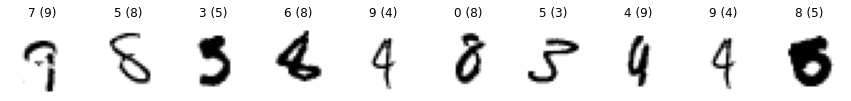

In [8]:
y_sigmoid = best['model'].predict(x_eval)
y_pred    = np.argmax(y_sigmoid, axis=-1)

#plot wrong predictions
pwk.plot_wrong_pred(x_eval, y_eval, y_pred)